# Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values.
Missing values refer to absence of value or observation in particular column or row. Handling missing values is essential in data analysis and machine learning because they can bias the results, reduce the accuracy of the model, and even cause errors during training or prediction.

There are several methods to handle missing values, including:

- Deleting rows or columns with missing values
- Imputing missing values with statistical measures such as mean, median, or mode
- Imputing missing values with machine learning models such as k-Nearest Neighbors or decision trees.

Some machine learning algorithms that are not affected by missing values are:

- Decision trees: Creating a new branch for the missing data.

- Random Forest: Handle missing values by averaging predictions from multiple trees.

- K-Nearest Neighbors: Excluding missing values from distance calculations.

- Gaussian Mixture Models: Estimating the missing values based on the available data.

- Singular Value Decomposition (SVD): Handle missing values by filling them with estimated values based on the available data.


# Q2: List down techniques used to handle missing data. Give an example of each with python code.
1. Deletion
2. Imputation

In [1]:
# Loading Data
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


(891, 15)

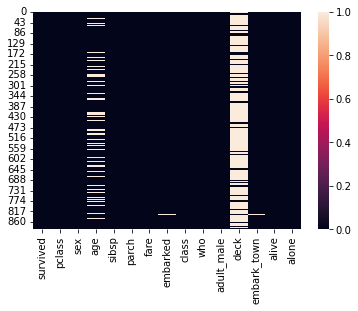

In [2]:
# Check missing value
print(df.isnull().sum())
# Graph for missing value
sns.heatmap(df.isnull())

# Check size of our data
df.shape

In [3]:
# 1. Deletion
#Delete rows containing NAN
df_row = df.dropna()
# Delete columns containing NAN
df_column = df.dropna(axis=1)
print(f"If we delete rows our size become{df_row.shape}\nIf we delete columns our size become{df_column.shape}")


If we delete rows our size become(182, 15)
If we delete columns our size become(891, 11)


In [4]:
# Imputation
## replace NAN with mean

df['Age_mean']=df['age'].fillna(df['age'].mean())
## replace NAN with median
df = df.copy()
df['Age_median']=df['age'].fillna(df['age'].median())

## replace NAN with mode

mode = df[df['age'].notna()]['embarked'].mode()[0]
df['embarked_mode']=df['embarked'].fillna(mode)

#Showing
df[['age','Age_mean', 'Age_median','embarked', 'embarked_mode']]

,age,Age_mean,Age_median,embarked,embarked_mode
0,22.0,22.000000,22.0,S,S
1,38.0,38.000000,38.0,C,C
2,26.0,26.000000,26.0,S,S
3,35.0,35.000000,35.0,S,S
4,35.0,35.000000,35.0,S,S
...,...,...,...,...,...
886,27.0,27.000000,27.0,S,S
887,19.0,19.000000,19.0,S,S
888,NaN,29.699118,28.0,S,S
889,26.0,26.000000,26.0,C,C


# Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?
When distribution of classes in a classification dataset is not equal. This means that one class has significantly fewer samples compared to the other class(es) called imbalnced data.

If imbalanced data is not handled, it can lead to a biased model that performs poorly in predicting the minority class. The model will tend to predict the majority class more accurately and ignore the minority class. This can result in high false negative rates and low recall scores for the minority class, which can be very costly in real-world scenarios.


# Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down-sampling are required.

Up-sampling and Down-sampling used for handling imbalanced data .

In Up-sampling we will increase the no. of data of minority class to no. of data of majority class . Downsampling is vice versa of this Up-sampling. 


In [5]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [6]:
df_minority= df[df['survived']==1]
df_majority= df[df['survived']==0]
df_minority.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median,embarked_mode
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0,S
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0,S
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,27.0,27.0,S
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,14.0,14.0,C


In [7]:
import pandas as pd
from sklearn.utils import resample
df_majority.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median,embarked_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0,S
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0,S
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,29.699118,28.0,Q
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54.000000,54.0,S
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,2.000000,2.0,S


In [8]:
# Up-sampling
df_minority_upsample=resample(df_minority,
                              replace=True,
                              n_samples=len(df_majority), # to match the majority class)
                              random_state=42
                             )
df_upsampled= pd.concat([df_majority,df_minority_upsample])
df_upsampled['survived'].value_counts()

0    549
1    549
Name: survived, dtype: int64

In [9]:
# Down-sampling
df_majority_downsample=resample(df_majority,
                              replace=True,
                              n_samples=len(df_minority), # to match the minority class)
                              random_state=50
                             )
df_downsampled= pd.concat([df_minority,df_majority_downsample])
df_downsampled['survived'].value_counts()

1    342
0    342
Name: survived, dtype: int64

# Q5: What is data Augmentation? Explain SMOTE.
Data augmentation is a technique used to increase the amount of training data by generating additional synthetic data points from the original dataset. The aim of data augmentation is to improve the robustness and generalization of machine learning models.

SMOTE, which stands for Synthetic Minority Over-sampling Technique, is a popular data augmentation technique used to handle imbalanced data. It creates synthetic samples of the minority class by generating new examples that are interpolated between existing samples of the minority class.

SMOTE works by selecting a sample from the minority class and finding its k nearest neighbors. The synthetic samples are then created by interpolating between the selected sample and its neighbors. This process is repeated for a specified number of times, resulting in an augmented dataset that contains more samples from the minority class.

# Q6: What are outliers in a dataset? Why is it essential to handle outliers?
Outliers are observations that are significantly different from other observations in the dataset. They are data points that are distant from other data points or do not follow the general pattern of the dataset. Outliers can occur due to measurement errors, data entry errors, or simply due to natural variations in the data.

It is essential to handle outliers because they can significantly affect the results of data analysis and modeling. Outliers can skew the mean, variance, and other statistical measures, leading to incorrect conclusions about the data. In addition, many machine learning algorithms are sensitive to outliers and can lead to poor model performance.

# Q7: You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are some techniques you can use to handle the missing data in your analysis?
deletion or imputation based on data set .



# Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data?
- Visual inspection: One of the simplest ways to detect a pattern in the missing data is to visualize the data using a `heatmap`. A heatmap is a graphical representation of the data that uses color-coding to represent values. If there is a pattern in the missing data, it will be visible as a pattern in the heatmap.

- Statistical tests: Statistical tests such as the `chi-square test` or the `t-test` can be used to determine if the missing data is missing at random or if there is a pattern to the missing data. If the `p-value of the test is less than the significance level, it indicates that there is a pattern to the missing data`.

- Imputation: Another strategy to determine if the missing data is missing at random or not is to impute the missing values using different imputation methods and compare the results. If the results obtained from `different imputation methods are consistent, it indicates that the missing data is missing at random`.

# Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?
- Confusion matrix: A confusion matrix is a table that summarizes the performance of a classification algorithm. It shows the number of true positives, true negatives, false positives, and false negatives. The confusion matrix can be used to calculate various evaluation metrics such as precision, recall, F1-score, and accuracy.

- Precision-Recall Curve: The precision-recall curve is a graph that shows the trade-off between precision and recall for different classification thresholds. This curve is especially useful when the positive class is rare.

- ROC Curve: The ROC curve is a graph that shows the trade-off between sensitivity and specificity for different classification thresholds. This curve is also useful when the positive class is rare.

- Resampling techniques: Resampling techniques like oversampling the minority class or undersampling the majority class can be used to balance the dataset. This can help to improve the performance of the model.

- Cost-sensitive learning: In cost-sensitive learning, the cost of misclassification for each class is assigned a weight. This can help to improve the performance of the model on the minority class.

- Ensemble methods: Ensemble methods like bagging, boosting, and stacking can be used to combine the output of multiple models to improve the performance on the minority class.


# Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to balance the dataset and down-sample the majority class?
To balance the dataset and down-sample the majority class, we can use the following methods:

- Random Undersampling: In this method, we randomly remove some observations from the majority class to balance the dataset.

- Cluster-Based Undersampling: In this method, we use clustering techniques to group similar observations in the majority class and randomly remove some of them to balance the dataset.

- Tomek Links: In this method, we identify the Tomek Links between the majority and minority classes, which are the pairs of nearest neighbors in different classes. Then, we remove the majority class observations that form these links.



# Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class?
- Random Oversampling: In this method, the minority class samples are randomly selected and duplicated until it is the same size as the majority class. This method is simple and fast, but it can lead to overfitting.

- Synthetic Minority Over-sampling Technique (SMOTE): SMOTE generates synthetic samples for the minority class by interpolating between existing samples. It creates new samples that are similar to the existing minority samples but with small variations. This method reduces the risk of overfitting and improves the generalization of the model.

- Adaptive Synthetic (ADASYN): This method is similar to SMOTE, but it generates more synthetic samples for the minority class samples that are harder to learn. This method reduces the overfitting risk and improves the accuracy of the model.